In [5]:
%tensorflow_version 1.x


ERROR: Could not find a version that satisfies the requirement livelossplost (from versions: none)
ERROR: No matching distribution found for livelossplost


In [9]:
#!tar -xzf CINIC-10.tar.gz
#pip install livelossplot

Loading
+ Dataset loaded
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 

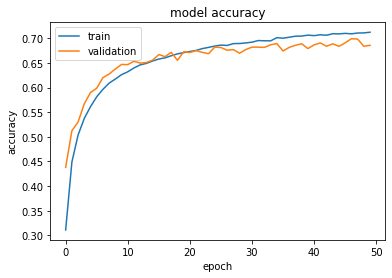

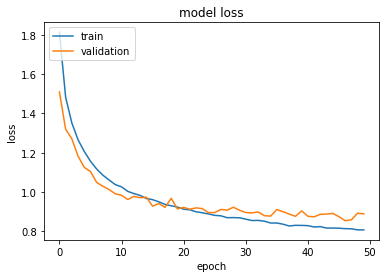

X_test: (90000, 32, 32, 3)
y_test: (90000, 10)
Imagem: (32, 32, 3)


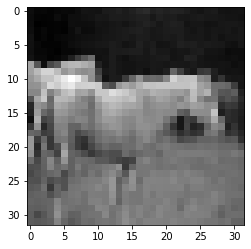

label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
antes do aumento de mais uma dimensão: (32, 32, 3)
depois do aumento de mais uma dimensão: (1, 32, 32, 3)
Classe prevista: 0
(?, 32, 32, 32)
(?, 30, 30, 32)
(?, 15, 15, 32)
(?, 15, 15, 32)
(?, 15, 15, 64)
(?, 13, 13, 64)
(?, 6, 6, 64)
(?, 6, 6, 64)
(?, 6, 6, 64)
(?, 4, 4, 64)
(?, 2, 2, 64)
(?, 2, 2, 64)
(1, 32, 32, 32)


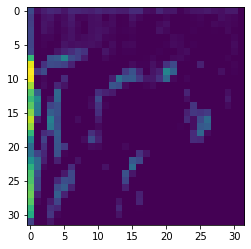

nome_camada: conv2d_6
n_features: 32
size: 32
n_linhas: 2
nome_camada: conv2d_7
n_features: 32
size: 30
n_linhas: 2
nome_camada: max_pooling2d_3
n_features: 32
size: 15
n_linhas: 2
nome_camada: dropout_4
n_features: 32
size: 15
n_linhas: 2
nome_camada: conv2d_8
n_features: 64
size: 15
n_linhas: 4
nome_camada: conv2d_9
n_features: 64
size: 13
n_linhas: 4
nome_camada: max_pooling2d_4
n_features: 64
size: 6
n_linhas: 4
nome_camada: dropout_5
n_features: 64
size: 6
n_linhas: 4
nome_camada: conv2d_10
n_features: 64
size: 6
n_linhas: 4
nome_camada: conv2d_11
n_features: 64
size: 4
n_linhas: 4
nome_camada: max_pooling2d_5
n_features: 64
size: 2
n_linhas: 4
nome_camada: dropout_6
n_features: 64
size: 2
n_linhas: 4


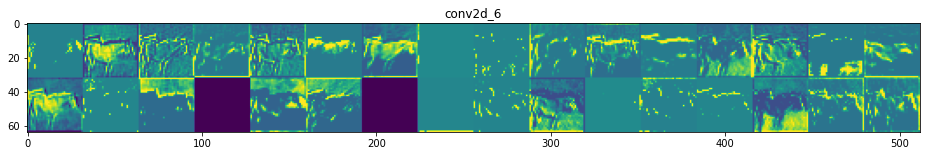

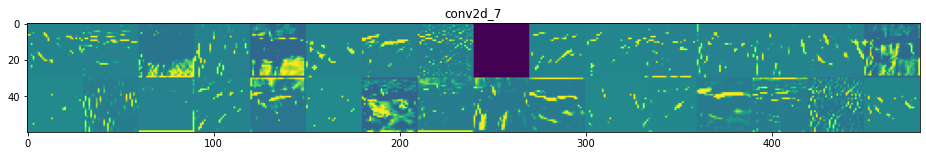

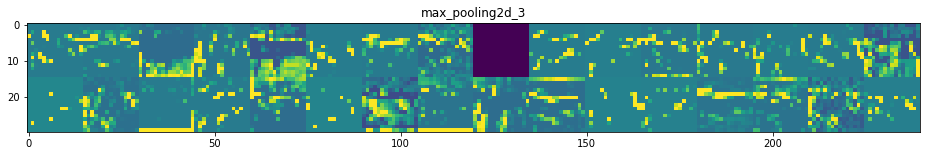

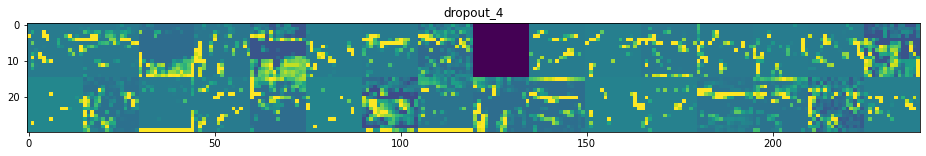

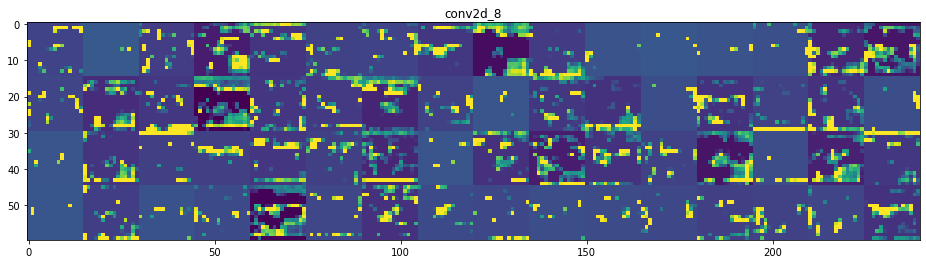

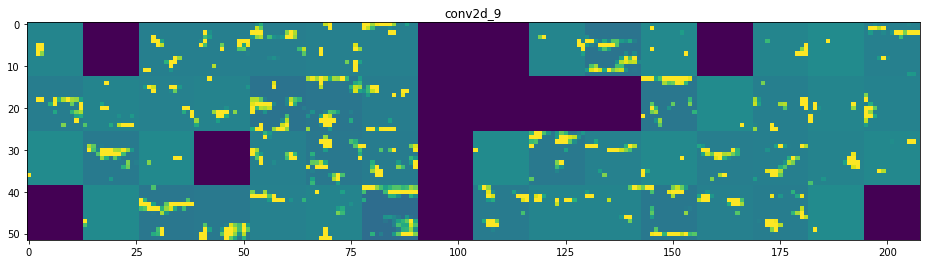

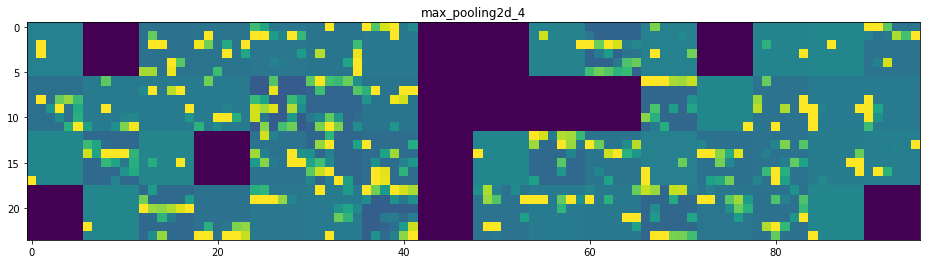

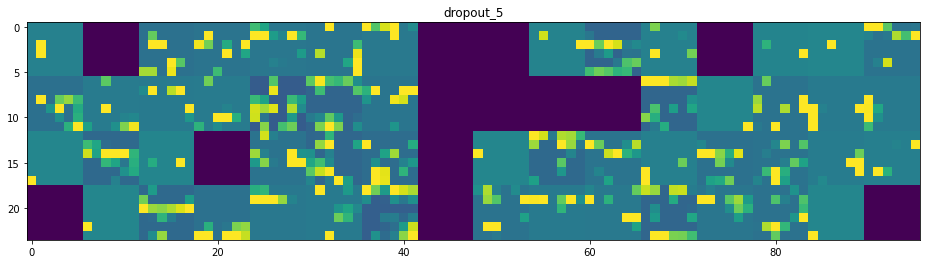

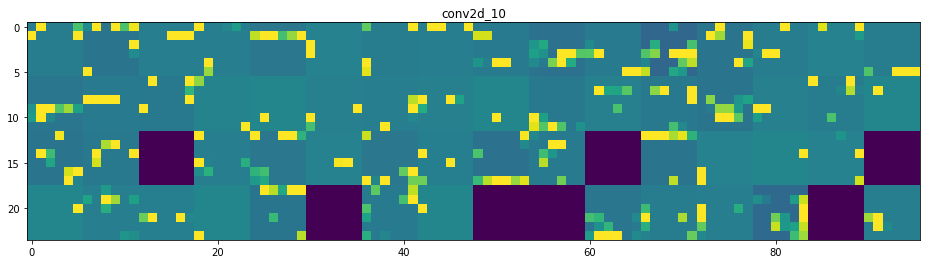

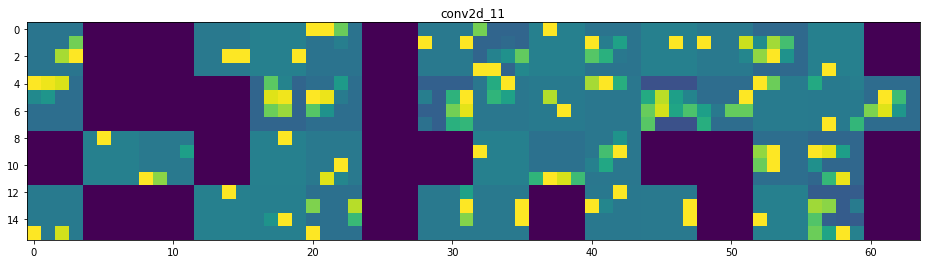

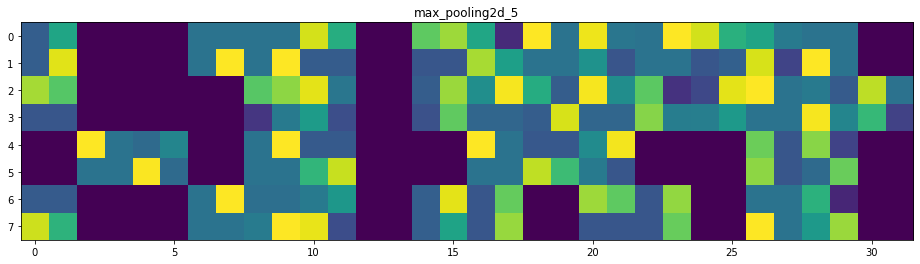

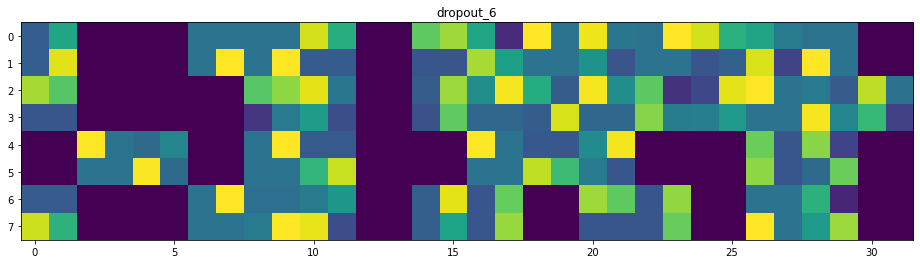

In [13]:

import tensorflow as tf
from keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import backend as K, models
from keras.utils import np_utils, get_file
from tensorflow.keras.callbacks import ModelCheckpoint
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
import os
import pickle
from keras.utils.data_utils import get_file
np.set_printoptions(threshold=sys.maxsize)
from keras.optimizers import SGD
from keras.constraints import maxnorm
from keras import backend as K
import keras
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
from keras import backend as K
import os
#from scipy import misc
from six.moves import urllib
import tarfile
# K.set_image_dim_ordering('th') #pode ser 'th' ou 'tf'
import matplotlib.pyplot as plt
import matplotlib
import random
#from scipy.misc import toimage
import warnings
warnings.filterwarnings("ignore")

def create_model(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape = (32, 32, 3), activation = 'relu'))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2)) 
    model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2)) 
    model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4)) 
    model.add(Flatten())
    model.add(Dense( 512, activation = 'relu'))
    model.add(Dropout(0.4)) 
    model.add(Dense(num_classes, activation = 'softmax'))
    return model

#funções para visulização do historial de aprendizagem
def print_history_accuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

def print_history_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# Visualizar imagem, label e correspondente previsão
def visualize_previsao(x_test, y_test, img_a_mostrar):
    print("X_test:",x_test.shape)
    print("y_test:",y_test.shape)
    print("Imagem:",x_test[img_a_mostrar].shape)
    plt.imshow(x_test[img_a_mostrar,:,:,0], cmap='gray')
    plt.show()
    print("label:",y_test[img_a_mostrar])
    print("antes do aumento de mais uma dimensão:",x_test[img_a_mostrar].shape)
    imagem_tensor = np.expand_dims(x_test[img_a_mostrar], axis=0)
    print("depois do aumento de mais uma dimensão:",imagem_tensor.shape)
    print('Classe prevista:',np.argmax(model.predict_classes(imagem_tensor),axis=-1))
    return imagem_tensor

def visualize_mnist(X_train):
    #(X_train, y_train), (X_test, y_test) = load_mnist_dataset('mnist.npz')
    plt.subplot(321)
    plt.imshow(X_train[0], cmap='gray')
    plt.subplot(322)
    plt.imshow(X_train[1], cmap='gray')
    plt.subplot(323)
    plt.imshow(X_train[2], cmap='gray')
    plt.subplot(324)
    plt.imshow(X_train[3], cmap='gray')
    plt.subplot(325)
    plt.imshow(X_train[4], cmap='gray')
    plt.subplot(326)
    plt.imshow(X_train[5], cmap='gray')
    plt.show()

def loadData(pathToDatasetFolder, oneHot=False):
    """
    pathToDatasetFolder: Parent folder of CINIC-10 dataset folder or CINIC-10.tar.gz file
    oneHot: Label encoding (one hot encoding or not)
    Return: Train, validation and test sets and label numpy arrays
    """
    labelDict = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3,
                'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8,
                'truck': 9}

    pathToTrain ="/content/train"
    pathToVal = "/content/valid"
    pathToTest = "/content/test"

    imgNamesTrain = [f for dp, dn, fn in os.walk(os.path.expanduser(pathToTrain)) for f in fn]
    imgDirsTrain = [dp for dp, dn, fn in os.walk(os.path.expanduser(pathToTrain)) for f in fn]
    imgNamesVal = [f for dp, dn, fn in os.walk(os.path.expanduser(pathToVal)) for f in fn]
    imgDirsVal = [dp for dp, dn, fn in os.walk(os.path.expanduser(pathToVal)) for f in fn]
    imgNamesTest = [f for dp, dn, fn in os.walk(os.path.expanduser(pathToTest)) for f in fn]
    imgDirsTest = [dp for dp, dn, fn in os.walk(os.path.expanduser(pathToTest)) for f in fn]

    list_size = len(imgNamesTrain) #5000 para teste

    XTrain = np.empty((list_size, 32, 32, 3), dtype=np.float32)
    YTrain = np.empty(list_size, dtype=np.int32)
    XVal = np.empty((list_size, 32, 32, 3), dtype=np.float32)
    YVal = np.empty(list_size, dtype=np.int32)
    XTest = np.empty((list_size, 32, 32, 3), dtype=np.float32)
    YTest = np.empty(list_size, dtype=np.int32)

    print("Loading")
    total=0
    lista = random.sample(range(len(imgNamesTrain)), list_size)
    j=0
    while(j<list_size):
        i=lista[j]
        # img = plt.imread(os.path.join(imgDirsTrain[i], imgNamesTrain[i]))
        img = matplotlib.pyplot.imread(os.path.join(imgDirsTrain[i], imgNamesTrain[i]))
        if len(img.shape) == 2:
            total+=1
            XTrain[j, :, :, 2] = XTrain[j, :, :, 1] = XTrain[j, :, :, 0] = img
        else:
            XTrain[j] = img
        YTrain[j] = labelDict[os.path.basename(imgDirsTrain[i])]

        # img = plt.imread(os.path.join(imgDirsVal[i], imgNamesVal[i]))
        img = matplotlib.pyplot.imread(os.path.join(imgDirsVal[i], imgNamesVal[i]))
        if len(img.shape) == 2:
            total+=1
            XVal[j, :, :, 2] = XVal[j, :, :, 1] = XVal[j, :, :, 0] = img
        else:
            XVal[j] = img
        YVal[j] = labelDict[os.path.basename(imgDirsVal[i])]

        # img = plt.imread(os.path.join(imgDirsTest[i], imgNamesTest[i]))
        img = matplotlib.pyplot.imread(os.path.join(imgDirsTest[i], imgNamesTest[i]))
        if len(img.shape) == 2:
            total+=1
            XTest[j, :, :, 2] = XTest[j, :, :, 1] = XTest[j, :, :, 0] = img
        else:
            XTest[j] = img
        YTest[j] = labelDict[os.path.basename(imgDirsTest[i])]

        j+=1

    XTrain.reshape(XTrain.shape[0], 3, 32, 32)
    XTest.reshape(XTest.shape[0], 3, 32, 32)
    XVal.reshape(XVal.shape[0], 3, 32, 32)
    YTrain = np.reshape(YTrain, (len(YTrain), 1))
    YTest = np.reshape(YTest, (len(YTest), 1))
    YVal = np.reshape(YVal, (len(YVal), 1))
    print("+ Dataset loaded")

    return XTrain, YTrain, XTest, YTest, XVal, YVal

X_train, y_train, X_test, y_test, X_validate, y_validate = loadData("/content")
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
y_validate = np_utils.to_categorical(y_validate, num_classes)
epochs = 50


model = create_model(y_train.shape[1])
model.summary()
model.compile(metrics= ['accuracy'],loss= 'categorical_crossentropy',optimizer='adam')

checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", monitor = 'val_acc', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, validation_data=(X_validate, y_validate), epochs=epochs, batch_size=150, shuffle=True, verbose=1, callbacks=[checkpointer])

model.load_weights('best_weights.hdf5')
model.save('cinic_cnn_plus_plus.h5')

#para utilizar:
#model=load_model('cinic_cnn_plus_plus.h5')

print_history_accuracy(history)
print_history_loss(history)


imagem_tensor = visualize_previsao(X_test, y_test, 3)

#Vamos buscar os outputs das primeiras 5 (plus) camadas da rede ou 12 para a plus_plus
camadas_outputs = []
for layer in model.layers[:12]:
    print(layer.output.shape)
    camadas_outputs.append(layer.output)

# e depois criamos um modelo que retorna estes outputs dado os inputs do modelo
activation_model = Model(inputs=model.input, outputs=camadas_outputs) 

activations = activation_model.predict(imagem_tensor) 
# Retorna uma lista com dois Numpy arrays: um array por camada de ativação


first_layer_activation = activations[0]
print(first_layer_activation.shape)

plt.imshow(first_layer_activation[0, :, :, 9], cmap='viridis')
plt.show()

nomes_camadas = []
for camada in model.layers[:12]:
    nomes_camadas.append(camada.name) # para puder colocar o nome da cada camada nas visualizações

imagens_por_linha = 16

for nome_camada, ativacao_camada in zip(nomes_camadas, activations): # o zip permite iterar simultaneamente em 2 listas
    n_features = ativacao_camada.shape[-1] # Numero de features no feature map, pois é o que está na ultima dimensão
    size = ativacao_camada.shape[1] #O feature map tem shape (1, tamanho, tamanho, numero_features).
    n_linhas = -(-n_features // imagens_por_linha) # Empilha os canais de ativação nesta matriz
    print("nome_camada:",nome_camada)
    print("n_features:",n_features)
    print("size:",size)
    print("n_linhas:",n_linhas)
    display_grid = np.zeros((size * n_linhas, imagens_por_linha * size))
    for col in range(n_linhas): # para fazer o display com 15 imagens por linha
        for lin in range(imagens_por_linha):
            #verificar aqui se a imagem existe
            imagem = ativacao_camada[0,:,:,col * imagens_por_linha + lin] #isto pode dar erro de out-of-range
            imagem -= imagem.mean() # pos-processamento para melhor visualização
            imagem /= imagem.std()
            imagem *= 64
            imagem += 128
            imagem = np.clip(imagem, 0, 255).astype('uint8') #valores <0 ficam 0 e >255 ficam = 255
            display_grid[col * size : (col + 1) * size,lin * size : (lin + 1) * size] = imagem
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(nome_camada)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')     